In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
plt.rc('font')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')


## We need to make sure that the False Positives(marking a customer good risk when they are bad) is a great loss.

In [2]:
df=pd.read_csv('German_Credit_data.csv')


In [3]:
df.isna().sum()

Creditability                                        0
Status_of_existing_account                           0
Duration_of_Credit_month                             0
Payment_Status_of_Previous_Credit(Credit_history)    0
Purpose_of_loan                                      0
Credit_Amount                                        0
Value_of_Savings_account&bonds                       0
Years_of_Present_Employment                          0
Percentage_of_disposable_income                      0
Sex_&_Marital_Status                                 0
Guarantors/Debtors                                   0
Duration_in_Present_Residence                        0
Property                                             0
Age_in_years                                         0
Concurrent_Credits                                   0
Housing                                              0
No_of_Credits_at_this__Bank                          0
Occupation                                           0
No_of_depe

In [4]:
df.describe()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


## Replacing column names to understand better

In [5]:
df.rename(columns={'Payment_Status_of_Previous_Credit(Credit_history)':'Credit_History'},inplace=True)
df.rename(columns={'Purpose_of_loan':'Purpose'},inplace=True)
df.rename(columns={'Value_of_Savings_account&bonds':'Savings_account'},inplace=True)
df.rename(columns={'Age_in_years':'Age'},inplace=True)
df.head()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Credit_History,Purpose,Credit_Amount,Savings_account,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [6]:
df.dtypes 

Creditability                      int64
Status_of_existing_account         int64
Duration_of_Credit_month           int64
Credit_History                     int64
Purpose                            int64
Credit_Amount                      int64
Savings_account                    int64
Years_of_Present_Employment        int64
Percentage_of_disposable_income    int64
Sex_&_Marital_Status               int64
Guarantors/Debtors                 int64
Duration_in_Present_Residence      int64
Property                           int64
Age                                int64
Concurrent_Credits                 int64
Housing                            int64
No_of_Credits_at_this__Bank        int64
Occupation                         int64
No_of_dependents                   int64
Telephone                          int64
Foreign_Worker                     int64
dtype: object

## There are both numerical as well as qualitative data included in the form of numbers.We need to map  the qualitative data accordingly for each feature.(for understading)


In [7]:
df.Status_of_existing_account.value_counts() #Has 4 categorical values which we need to assign

4    394
1    274
2    269
3     63
Name: Status_of_existing_account, dtype: int64

In [8]:

existing_accout={1:'<0DM',2:'0 <= .. <200DM',3:'>=200DM',4:'no chking acc'}
df['Status_of_existing_account']=df['Status_of_existing_account'].map(existing_accout) 

In [9]:
df.Status_of_existing_account.value_counts() 

no chking acc     394
<0DM              274
0 <= .. <200DM    269
>=200DM            63
Name: Status_of_existing_account, dtype: int64

## Doing this for all the qualitative features


In [10]:
df['Credit_History'].value_counts()

2    530
4    293
3     88
1     49
0     40
Name: Credit_History, dtype: int64

In [11]:
payment_status={0:'no credits taken',1:'all credits paid back duly',2:'all credits paid back duly til now',3:'delay in paying off in the past',4:'critical account/ other credits existing (not at this bank)'}
df['Credit_History']=df['Credit_History'].map(payment_status)

In [12]:
df['Credit_History'].value_counts()

all credits paid back duly til now                             530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                 88
all credits paid back duly                                      49
no credits taken                                                40
Name: Credit_History, dtype: int64

In [13]:
df.Purpose.value_counts()

3     280
0     234
2     181
1     103
9      97
6      50
5      22
10     12
4      12
8       9
Name: Purpose, dtype: int64

In [14]:
purpose={0:'car(new)',1:'car(old)',2:'furniture/equipment',3:'radio/television',4:'domestic appliances',5:'repairs',6:'education',7:'(vacation - does not exist?)',8:'retraining',9:'business',10:'others'}
df['Purpose']=df['Purpose'].map(purpose)

In [15]:
df.Purpose.value_counts()

radio/television       280
car(new)               234
furniture/equipment    181
car(old)               103
business                97
education               50
repairs                 22
others                  12
domestic appliances     12
retraining               9
Name: Purpose, dtype: int64

In [16]:
value={1:'..<100 DM',2:'100 <= ..<500 DM',3:'500 <=..<=1000',4:'.. >= 1000 DM',5:'unknown/ no savings account'}
df['Savings_account']=df['Savings_account'].map(value)

In [17]:
df['Savings_account'].value_counts()

..<100 DM                      603
unknown/ no savings account    183
100 <= ..<500 DM               103
500 <=..<=1000                  63
.. >= 1000 DM                   48
Name: Savings_account, dtype: int64

In [18]:
employment={1:'unemployed',2:'..<=1year',3:'1 <= ... < 4 years',4:'4 <= ... < 7 years',5:'.. >= 7 years'}
df['Years_of_Present_Employment']=df['Years_of_Present_Employment'].map(employment)

In [19]:
df.Years_of_Present_Employment.value_counts()

1 <= ... < 4 years    339
.. >= 7 years         253
4 <= ... < 7 years    174
..<=1year             172
unemployed             62
Name: Years_of_Present_Employment, dtype: int64

In [20]:
Sex_Marital={1:'male : divorced/separated',2:'female : divorced/separated/married',3:'male : single',4:'male : married/widowed',5:'female : single'}
df['Sex_&_Marital_Status']=df['Sex_&_Marital_Status'].map(Sex_Marital)

In [21]:
df['Sex_&_Marital_Status'].unique()

array(['female : divorced/separated/married', 'male : single',
       'male : married/widowed', 'male : divorced/separated'],
      dtype=object)

In [22]:
df.Property.value_counts()

3    332
1    282
2    232
4    154
Name: Property, dtype: int64

In [23]:
propert={1:'real_estate',2:'if not 1 : building society savings agreement/ lifeinsurance',3:'if not A121/A122 : car or other, not in attribute 6',4:'unknown/noproperty'}
df['Property']=df['Property'].map(propert)

In [24]:
df['Property'].value_counts()

if not A121/A122 : car or other, not in attribute 6             332
real_estate                                                     282
if not 1 : building society savings agreement/ lifeinsurance    232
unknown/noproperty                                              154
Name: Property, dtype: int64

In [25]:
df['Concurrent_Credits'].value_counts()

3    814
1    139
2     47
Name: Concurrent_Credits, dtype: int64

In [26]:
other_plans={1:'bank',2:'stores',3:'none'}
df['Concurrent_Credits']=df['Concurrent_Credits'].map(other_plans)

In [27]:
house={1:'rent',2:'own',3:'for free'}
df['Housing']=df['Housing'].map(house)

In [28]:
job={1:'unemployed/ unskilled - non-resident',2:'unskilled - resident',3:': skilled employee / official',4:'management/ self-employed/highly'}
df['Occupation']=df['Occupation'].map(job)     

In [29]:
tel={1:'No',2:'yes, registered under the customers name'}
df['Telephone']=df['Telephone'].map(tel)

In [30]:
foreign={1:'Yes',2:'No'}
df['Foreign_Worker']=df['Foreign_Worker'].map(foreign)

In [31]:
df['Guarantors/Debtors'].value_counts()
gurant={1:'None',2:'Co-applicant',3:'Guarntor'}
df['Guarantors/Debtors']=df['Guarantors/Debtors'].map(gurant)

## We have successfully converted all the number data to categorical data which can be understood

In [32]:

clus=df.copy()
df.to_csv('German Data')

## Lets perform Some EDA

In [33]:
print('Number of continous feature are \n',df.select_dtypes(include=['int64']).dtypes)

Number of continous feature are 
 Creditability                      int64
Duration_of_Credit_month           int64
Credit_Amount                      int64
Percentage_of_disposable_income    int64
Duration_in_Present_Residence      int64
Age                                int64
No_of_Credits_at_this__Bank        int64
No_of_dependents                   int64
dtype: object


In [34]:
#Here we need to predict the creditability 
df['Creditability'].value_counts(normalize=True) #The data is not highly imbalaned

1    0.7
0    0.3
Name: Creditability, dtype: float64

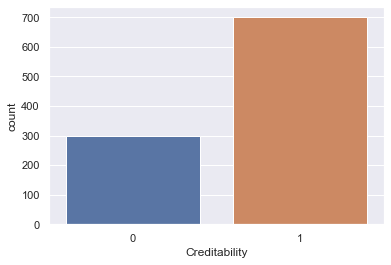

In [35]:
sns.countplot(df['Creditability'])#Here 1 is good risk 0 is bad risk
plt.savefig('Creditability')
plt.show()

In [36]:
df.groupby('Creditability').mean()


,Duration_of_Credit_month,Credit_Amount,Percentage_of_disposable_income,Duration_in_Present_Residence,Age,No_of_Credits_at_this__Bank,No_of_dependents
Creditability,,,,,,,
0,24.860000,3938.126667,3.096667,2.850000,33.96,1.366667,1.153333
1,19.207143,2985.442857,2.920000,2.842857,36.22,1.424286,1.155714


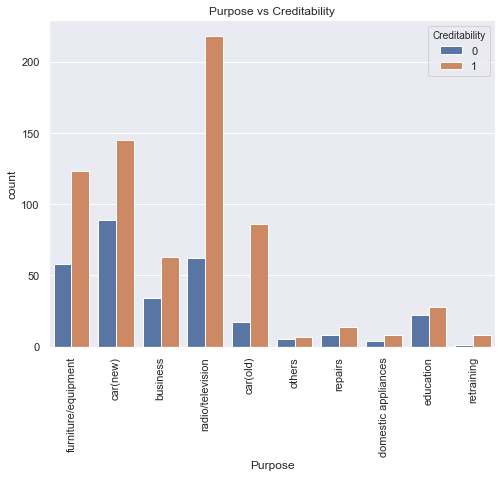

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(df.Purpose,hue=df.Creditability)
plt.xticks(rotation=90)
plt.title('Purpose vs Creditability')
plt.savefig('Purpose vs Creditability',bbox_inches='tight')
#Good Credits are higher for particular purposes like Radio/Telivision or car(new)

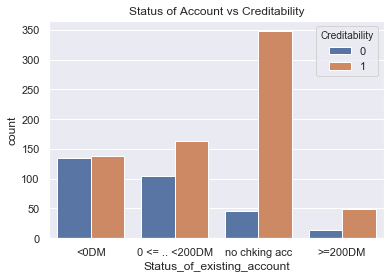

In [38]:
sns.countplot(x='Status_of_existing_account',data=df,hue='Creditability')
plt.savefig('Status of Account',bbox_inches='tight')
plt.title('Status of Account vs Creditability')
plt.show()

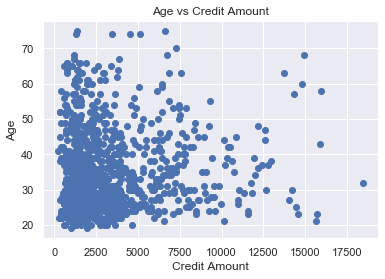

In [39]:
plt.scatter(df['Credit_Amount'],df['Age'])
plt.xlabel('Credit Amount')
plt.ylabel('Age')
plt.title('Age vs Credit Amount')
plt.savefig('Age vs Credit Amount')
plt.grid(True)



<Figure size 576x432 with 0 Axes>

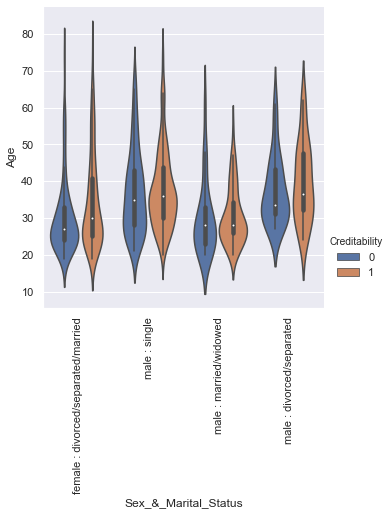

In [40]:
plt.figure(figsize=(8,6))
sns.catplot(x='Sex_&_Marital_Status',y='Age',hue='Creditability',data=df,kind='violin',height=5)
plt.xticks(rotation=90)

plt.savefig('Age vs Sex_Martial status',bbox_inches='tight')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

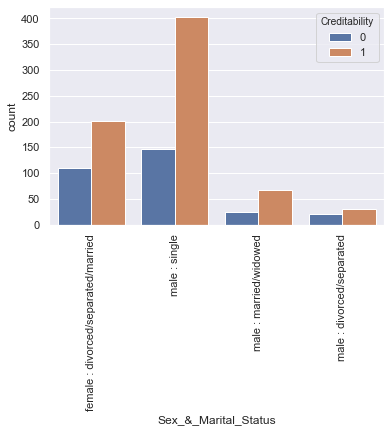

In [41]:
#Visualizing all Count plots for all categorical Features
sns.countplot(x='Sex_&_Marital_Status',data=df,hue='Creditability')
plt.xticks(rotation=90)

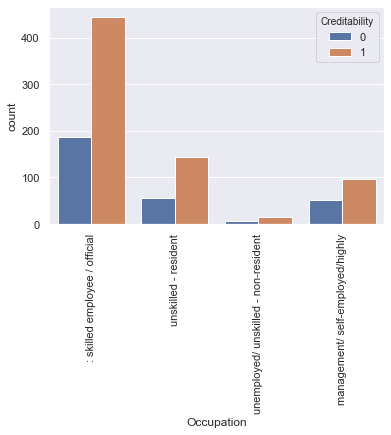

In [42]:
sns.countplot(x='Occupation',data=df,hue='Creditability')
plt.xticks(rotation=90)
plt.savefig('Creditability vs Occupation',bbox_inches='tight')
plt.show()
#It can be mentioned that skilled employee has a high good credit score

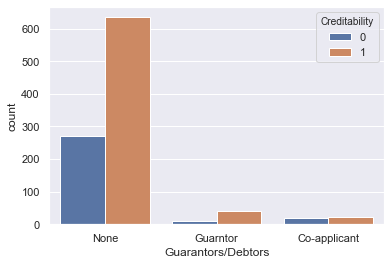

In [43]:
sns.countplot(x='Guarantors/Debtors',data=df,hue='Creditability')
plt.show()

In [44]:
#CategoriaL Variables

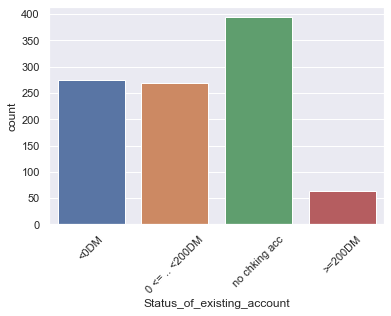

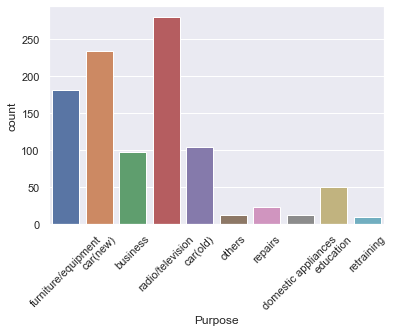

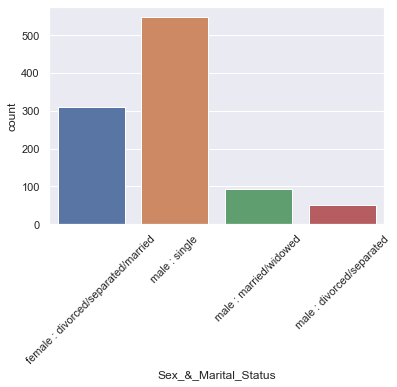

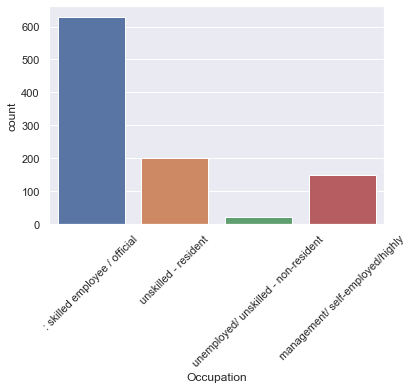

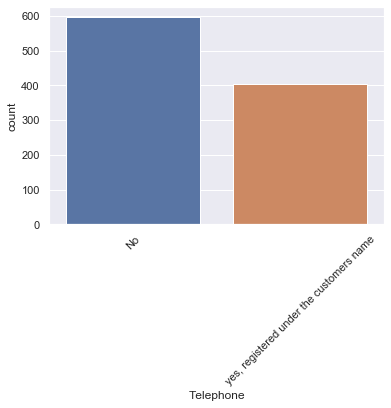

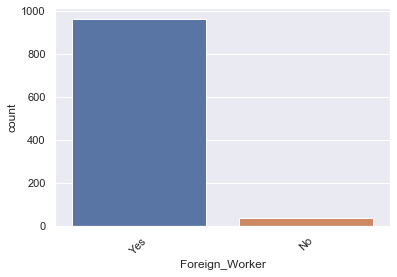

In [45]:

Eda=['Status_of_existing_account','Purpose','Sex_&_Marital_Status','Occupation','Telephone','Foreign_Worker']
for col in Eda:
    sns.countplot(x=col,data=df)
    plt.xticks(rotation=45)
    plt.savefig('{} Count'.format(col),bbox_inches='tight')
    plt.show()    
        

In [46]:
df.nunique()

Creditability                        2
Status_of_existing_account           4
Duration_of_Credit_month            33
Credit_History                       5
Purpose                             10
Credit_Amount                      923
Savings_account                      5
Years_of_Present_Employment          5
Percentage_of_disposable_income      4
Sex_&_Marital_Status                 4
Guarantors/Debtors                   3
Duration_in_Present_Residence        4
Property                             4
Age                                 53
Concurrent_Credits                   3
Housing                              3
No_of_Credits_at_this__Bank          4
Occupation                           4
No_of_dependents                     2
Telephone                            2
Foreign_Worker                       2
dtype: int64

In [47]:
df.Property.value_counts()

if not A121/A122 : car or other, not in attribute 6             332
real_estate                                                     282
if not 1 : building society savings agreement/ lifeinsurance    232
unknown/noproperty                                              154
Name: Property, dtype: int64

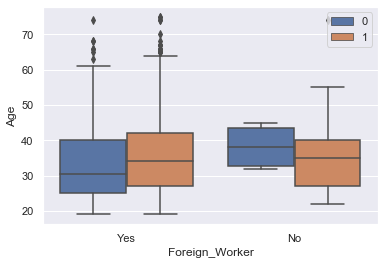

In [48]:
sns.boxplot(x='Foreign_Worker',y='Age',hue='Creditability',data=df,dodge=True)
plt.legend(loc='upper right')
plt.savefig('Foreign_Worker vs Age')
plt.show()

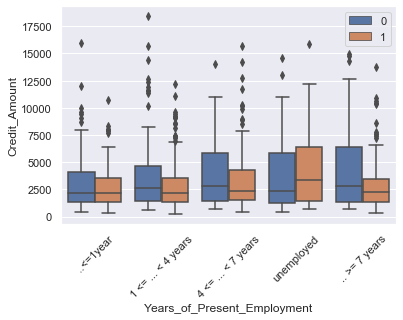

In [49]:
sns.boxplot(x='Years_of_Present_Employment',y='Credit_Amount',hue='Creditability',data=df,dodge=True)
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.savefig('Years_of_Present_Employment vs Credit Amount',bbox_inches='tight')

plt.show()

## Lets look at the Age distribution for Good and Bad customers

In [50]:
good=df.loc[df['Creditability']==1]['Age'].values.tolist()
bad=df.loc[df['Creditability']==0]['Age'].values.tolist()

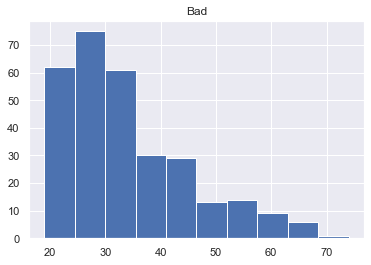

In [51]:
plt.hist(bad,bins=10,histtype='bar')
plt.title('Bad')
plt.show()

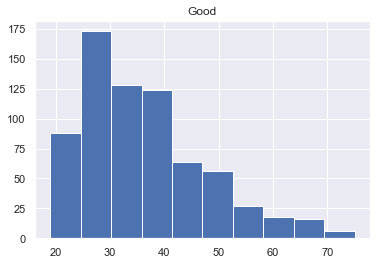

In [52]:
plt.hist(good,bins=10,histtype='bar')
plt.title('Good')
plt.show() 
#There is not much difference in Age Distribution

## Creating Dummy Variables for Categorical Features


In [53]:
Categorical=['Status_of_existing_account','Credit_History','Purpose','Savings_account','Years_of_Present_Employment','Sex_&_Marital_Status','Guarantors/Debtors','Property','Concurrent_Credits','Housing','Occupation','Telephone','Foreign_Worker']


In [54]:
for cat in Categorical:
    pre='var'+'_'+cat
    cat_list=pd.get_dummies(df[cat],prefix=pre)
    data1=df.join(cat_list)
    df=data1

In [55]:
df.head()


,Creditability,Status_of_existing_account,Duration_of_Credit_month,Credit_History,Purpose,Credit_Amount,Savings_account,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,var_Housing_own,var_Housing_rent,var_Occupation_: skilled employee / official,var_Occupation_management/ self-employed/highly,var_Occupation_unemployed/ unskilled - non-resident,var_Occupation_unskilled - resident,var_Telephone_No,"var_Telephone_yes, registered under the customers name",var_Foreign_Worker_No,var_Foreign_Worker_Yes
0,1,<0DM,18,critical account/ other credits existing (not ...,furniture/equipment,1049,..<100 DM,..<=1year,4,female : divorced/separated/married,...,0,1,1,0,0,0,1,0,0,1
1,1,<0DM,9,critical account/ other credits existing (not ...,car(new),2799,..<100 DM,1 <= ... < 4 years,2,male : single,...,0,1,1,0,0,0,1,0,0,1
2,1,0 <= .. <200DM,12,all credits paid back duly til now,business,841,100 <= ..<500 DM,4 <= ... < 7 years,2,female : divorced/separated/married,...,0,1,0,0,0,1,1,0,0,1
3,1,<0DM,12,critical account/ other credits existing (not ...,car(new),2122,..<100 DM,1 <= ... < 4 years,3,male : single,...,0,1,0,0,0,1,1,0,1,0
4,1,<0DM,12,critical account/ other credits existing (not ...,car(new),2171,..<100 DM,1 <= ... < 4 years,4,male : single,...,1,0,0,0,0,1,1,0,1,0


In [56]:
for col in Categorical:
    df.drop(col,axis=1,inplace=True)
    

In [57]:
df.columns

Index(['Creditability', 'Duration_of_Credit_month', 'Credit_Amount',
       'Percentage_of_disposable_income', 'Duration_in_Present_Residence',
       'Age', 'No_of_Credits_at_this__Bank', 'No_of_dependents',
       'var_Status_of_existing_account_0 <= .. <200DM',
       'var_Status_of_existing_account_<0DM',
       'var_Status_of_existing_account_>=200DM',
       'var_Status_of_existing_account_no chking acc',
       'var_Credit_History_all credits paid back duly',
       'var_Credit_History_all credits paid back duly til now',
       'var_Credit_History_critical account/ other credits existing (not at this bank)',
       'var_Credit_History_delay in paying off in the past',
       'var_Credit_History_no credits taken', 'var_Purpose_business',
       'var_Purpose_car(new)', 'var_Purpose_car(old)',
       'var_Purpose_domestic appliances', 'var_Purpose_education',
       'var_Purpose_furniture/equipment', 'var_Purpose_others',
       'var_Purpose_radio/television', 'var_Purpose_repairs

In [58]:
#Lets scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
colums_to_scale=['Credit_Amount','Duration_of_Credit_month','Percentage_of_disposable_income','Age','No_of_Credits_at_this__Bank','No_of_dependents']
df[colums_to_scale]=scaler.fit_transform(df[colums_to_scale])

In [59]:
df.head()
df.dtypes
df_with_dummies=df.copy()

In [60]:
X=df.drop('Creditability',axis=1)
Y=df['Creditability']


In [61]:
#Splitting Data in Train and Test
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X,Y,random_state=15,test_size=0.2)
print(X_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)

(800, 61)
(200, 61)
(800,)
(200,)


## Base Model

In [62]:
#Base Model Considering every Feature
from sklearn.linear_model import LogisticRegression

In [63]:
logreg=LogisticRegression(random_state=15)
logreg.fit(X_train,Y_train)

LogisticRegression(random_state=15)

In [64]:
y_pred=logreg.predict(x_test)
y_pred_train=logreg.predict(X_train)

In [65]:
#Lets test the metrics of our Base Model
from sklearn import metrics

In [66]:
print('For test set',metrics.accuracy_score(y_test,y_pred))
print('For train set',metrics.accuracy_score(Y_train,y_pred_train))

For test set 0.76
For train set 0.785


In [67]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.45      0.56        67
           1       0.77      0.92      0.84       133

    accuracy                           0.76       200
   macro avg       0.75      0.68      0.70       200
weighted avg       0.76      0.76      0.74       200



In [68]:
print(metrics.classification_report(Y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.67      0.51      0.58       233
           1       0.82      0.90      0.86       567

    accuracy                           0.79       800
   macro avg       0.74      0.70      0.72       800
weighted avg       0.77      0.79      0.78       800



In [69]:
tn,fp,fn,tp = metrics.confusion_matrix(y_test,y_pred).ravel()
print('True Negative',tn)
print('False Postives',fp)
print('False Negatives',fn)
print('True Postives',tp)


True Negative 30
False Postives 37
False Negatives 11
True Postives 122


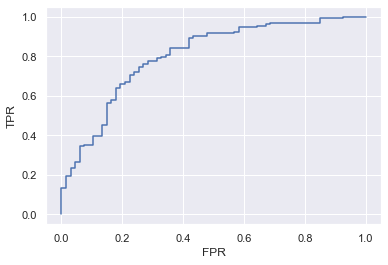

In [70]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,logreg.predict_proba(x_test)[:,1])
plt.grid(True)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


In [71]:
t=[i for i in thresholds]
tpr=[i for i in tpr]
fpr=[i for i in fpr]

In [72]:
Rocdf=pd.DataFrame((tpr,fpr,t)).T

In [73]:
Rocdf.columns=('Threshold','fpr','tpr')

In [74]:
Rocdf[Rocdf['tpr']>0.90][Rocdf['fpr']<0.25]

,Threshold,fpr,tpr
0,0.000000,0.000000,1.988471
1,0.007519,0.000000,0.988471
2,0.135338,0.000000,0.967878
3,0.135338,0.014925,0.967448
4,0.195489,0.014925,0.953301
5,0.195489,0.029851,0.947596
6,0.233083,0.029851,0.941996
7,0.233083,0.044776,0.941373
8,0.263158,0.044776,0.935581
9,0.263158,0.059701,0.934309


Oversampling and choosing best features which affect the classes

In [75]:
#Lets try to balance the dataset with SMOTE (over-sampling)
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train1, x_test1, Y_train1, y_test1 = train_test_split(X, Y, test_size=0.2, random_state=14)
os_data_X,os_data_y = os.fit_sample(X_train1, Y_train1)
os_data_X = pd.DataFrame(data=os_data_X,columns=X_train1.columns.values.tolist())
os_data_y=pd.DataFrame(data=os_data_y,columns=['Creditability'])


In [76]:
print(type(X_train1))
print(type(os_data_X))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [77]:
print(os_data_X.shape)
print(os_data_y.shape)

(1134, 61)
(1134, 1)


In [78]:
#For 2nd feature selection technique
x_test2=x_test1
y_test2=y_test1
x_test3=x_test1

In [79]:
len(os_data_X)

1134

## IMPLEMENTING RECURSIVE FEATURE ELIMINATION

In [80]:
##Trying Feature Selection to Improve Model Result
from sklearn.feature_selection import RFE
rfe=RFE(logreg,25)
rfe=rfe.fit(os_data_X,os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False  True  True False
 False False False False False False  True False False False False False
 False False  True False False False False  True  True  True  True  True
  True  True  True  True False  True False  True  True  True False  True
  True  True  True  True False False False False False  True  True  True
 False]
[30 21 23 36 29 32 31  3  4  1  1 26 15  6 14 34 13 37  1 12 33  9 20  8
 22  7  1 28 24 27  5  1  1  1  1  1  1  1  1  1 35  1 25  1  1  1 19  1
  1  1  1  1  2 17 18 11 16  1  1  1 10]


In [81]:
#Keeping only the best 25 features
cols = []
for i in range(len(os_data_X.columns)):
    if rfe.ranking_[i] == 1:
               cols.append(os_data_X.columns[i])

In [82]:
X1=os_data_X[cols]
Y1=os_data_y['Creditability']
x_test1=x_test1[cols]



In [83]:
print(os_data_X.shape)
print(os_data_y.shape)

(1134, 61)
(1134, 1)


In [84]:
logreg=LogisticRegression()
logreg.fit(X1,Y1)

LogisticRegression()

In [85]:
y_pred=logreg.predict(x_test1)

In [86]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test1,y_pred).ravel()
print('True Negative',tn)
print('False Postives',fp)
print('False Negatives',fn)
print('True Postives',tp)

True Negative 37
False Postives 30
False Negatives 27
True Postives 106


In [87]:
print(metrics.classification_report(y_test1,y_pred))
#Here we see the result is  quite better than our base model

              precision    recall  f1-score   support

           0       0.58      0.55      0.56        67
           1       0.78      0.80      0.79       133

    accuracy                           0.71       200
   macro avg       0.68      0.67      0.68       200
weighted avg       0.71      0.71      0.71       200



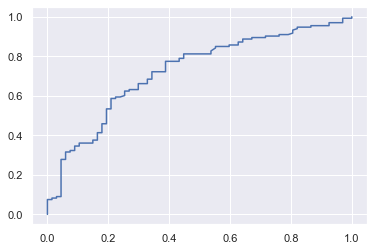

In [88]:
fpr,tpr,thresholds=metrics.roc_curve(y_test1,logreg.predict_proba(x_test1)[:,1])
plt.grid(True)
plt.plot(fpr,tpr)

In [89]:
import statsmodels.api as sm
logit_model=sm.Logit(Y1,X1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.494210
         Iterations 7
                                                     Results: Logit
Model:                                  Logit                              Pseudo R-squared:                   0.287     
Dependent Variable:                     Creditability                      AIC:                                1170.8684 
Date:                                   2020-07-16 19:28                   BIC:                                1296.7061 
No. Observations:                       1134                               Log-Likelihood:                     -560.43   
Df Model:                               24                                 LL-Null:                            -786.03   
Df Residuals:                           1109                               LLR p-value:                        2.1505e-80
Converged:                              1.0000                             Scale:                 

In [90]:
cols_=['var_Sex_&_Marital_Status_male : divorced/separated','var_Sex_&_Marital_Status_male : married/widowed','var_Sex_&_Marital_Status_male : single','var_Housing_for free']

In [91]:
X1.drop(columns=cols_,axis=1,inplace=True)
x_test1.drop(columns=cols_,axis=1,inplace=True)


In [92]:
logreg.fit(X1,Y1)
y_pred=logreg.predict(x_test1)
print(metrics.classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.52      0.53        67
           1       0.76      0.77      0.76       133

    accuracy                           0.69       200
   macro avg       0.65      0.64      0.65       200
weighted avg       0.68      0.69      0.68       200



In [93]:
Threshold=0.6
preds=np.where(logreg.predict_proba(x_test1)[:,1]>Threshold,1,0)
print(metrics.classification_report(y_test1,preds))


              precision    recall  f1-score   support

           0       0.53      0.69      0.60        67
           1       0.81      0.69      0.75       133

    accuracy                           0.69       200
   macro avg       0.67      0.69      0.67       200
weighted avg       0.72      0.69      0.70       200



In [94]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test1,preds).ravel()
print('True Negative',tn)
print('False Postives',fp)
print('False Negatives',fn)
print('True Postives',tp)

True Negative 46
False Postives 21
False Negatives 41
True Postives 92


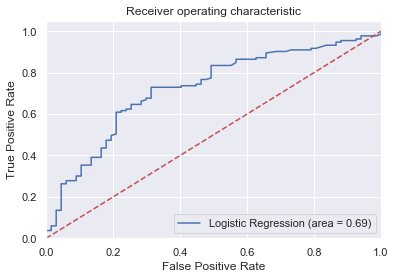

In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test1,preds)
fpr, tpr, thresholds = roc_curve(y_test1, logreg.predict_proba(x_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.savefig('Log_ROC')
plt.show()

In [96]:
#Trying another method called Selectfrommodel
from sklearn.feature_selection import SelectFromModel
smf=SelectFromModel(logreg,threshold=-np.inf,max_features=25)
smf.fit(os_data_X,os_data_y)
feature_id=smf.get_support()
feature_name=os_data_X.columns[feature_id]
feature_name

Index(['var_Status_of_existing_account_>=200DM',
       'var_Status_of_existing_account_no chking acc',
       'var_Credit_History_critical account/ other credits existing (not at this bank)',
       'var_Credit_History_delay in paying off in the past',
       'var_Purpose_business', 'var_Purpose_car(old)',
       'var_Purpose_furniture/equipment', 'var_Purpose_radio/television',
       'var_Purpose_retraining', 'var_Savings_account_.. >= 1000 DM',
       'var_Savings_account_unknown/ no savings account',
       'var_Years_of_Present_Employment_.. >= 7 years',
       'var_Years_of_Present_Employment_..<=1year',
       'var_Years_of_Present_Employment_4 <= ... < 7 years',
       'var_Sex_&_Marital_Status_male : married/widowed',
       'var_Sex_&_Marital_Status_male : single',
       'var_Guarantors/Debtors_Guarntor',
       'var_Property_if not 1 : building society savings agreement/ lifeinsurance',
       'var_Property_if not A121/A122 : car or other, not in attribute 6',
       'var_

In [97]:
x_test2.shape

(200, 61)

In [98]:
X2=os_data_X[feature_name]
Y2=os_data_y
x_test2=x_test2[feature_name]


In [99]:
x_test2.shape

(200, 25)

In [100]:
logreg.fit(X2,Y2)


LogisticRegression()

In [101]:
y_pred2=logreg.predict(x_test2)
print(metrics.classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55        67
           1       0.77      0.81      0.79       133

    accuracy                           0.71       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.71      0.71      0.71       200



In [102]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test2,y_pred2).ravel()
print('True Negative',tn)
print('False Postives',fp)
print('False Negatives',fn)
print('True Postives',tp)

True Negative 35
False Postives 32
False Negatives 25
True Postives 108


In [103]:
#Analyse summary using stats model
import statsmodels.api as sm
logit_model=sm.Logit(Y2,X2)
result=logit_model.fit()


Optimization terminated successfully.
         Current function value: 0.518661
         Iterations 7


In [104]:
print(result.summary2())

                                                        Results: Logit
Model:                                   Logit                                Pseudo R-squared:                     0.252     
Dependent Variable:                      Creditability                        AIC:                                  1226.3228 
Date:                                    2020-07-16 19:28                     BIC:                                  1352.1605 
No. Observations:                        1134                                 Log-Likelihood:                       -588.16   
Df Model:                                24                                   LL-Null:                              -786.03   
Df Residuals:                            1109                                 LLR p-value:                          5.6353e-69
Converged:                               1.0000                               Scale:                                1.0000    
No. Iterations:                         

In [105]:
#Removing the features according to their P-values
cols_=['var_Telephone_yes, registered under the customers name','var_Occupation_unemployed/ unskilled - non-resident','var_Housing_for free','var_Property_real_estate','var_Property_if not 1 : building society savings agreement/ lifeinsurance','var_Sex_&_Marital_Status_male : married/widowed','var_Years_of_Present_Employment_.. >= 7 years']

In [106]:
X2.drop(columns=cols_,axis=1,inplace=True)
print(X2.shape)
X2.head()
x_test2.drop(columns=cols_,axis=1,inplace=True)

(1134, 18)


In [107]:
logit_model=sm.Logit(Y2,X2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.525420
         Iterations 7
                                                        Results: Logit
Model:                                   Logit                                Pseudo R-squared:                     0.242     
Dependent Variable:                      Creditability                        AIC:                                  1227.6522 
Date:                                    2020-07-16 19:28                     BIC:                                  1318.2553 
No. Observations:                        1134                                 Log-Likelihood:                       -595.83   
Df Model:                                17                                   LL-Null:                              -786.03   
Df Residuals:                            1116                                 LLR p-value:                          2.2923e-70
Converged:                               1.0000                  

In [108]:
cols_=['var_Property_if not A121/A122 : car or other, not in attribute 6','var_Years_of_Present_Employment_4 <= ... < 7 years','var_Credit_History_delay in paying off in the past']

In [109]:
X2.drop(columns=cols_,axis=1,inplace=True)
print(X2.shape)
X2.head()
x_test2.drop(columns=cols_,axis=1,inplace=True)

(1134, 15)


In [110]:
logit_model=sm.Logit(Y2,X2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.528681
         Iterations 7
                                                        Results: Logit
Model:                                   Logit                                Pseudo R-squared:                     0.237     
Dependent Variable:                      Creditability                        AIC:                                  1229.0492 
Date:                                    2020-07-16 19:28                     BIC:                                  1304.5518 
No. Observations:                        1134                                 Log-Likelihood:                       -599.52   
Df Model:                                14                                   LL-Null:                              -786.03   
Df Residuals:                            1119                                 LLR p-value:                          6.0691e-71
Converged:                               1.0000                  

In [111]:
#Again checking the model for scores after removing features
logreg.fit(X2,Y2)


LogisticRegression()

In [112]:
y_preds3=logreg.predict(x_test2)

In [113]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test2,y_preds3).ravel()
print('True Negative',tn)
print('False Postives',fp)
print('False Negatives',fn)
print('True Postives',tp)

True Negative 39
False Postives 28
False Negatives 33
True Postives 100


In [114]:
print(metrics.classification_report(y_test2,y_preds3))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        67
           1       0.78      0.75      0.77       133

    accuracy                           0.69       200
   macro avg       0.66      0.67      0.66       200
weighted avg       0.70      0.69      0.70       200



In [115]:
metrics.accuracy_score(y_test2,y_preds3)

0.695

In [116]:
Threshold=0.60
preds1=np.where(logreg.predict_proba(x_test2)[:,1]>Threshold,1,0)
print(metrics.classification_report(y_test2,preds1))

              precision    recall  f1-score   support

           0       0.51      0.64      0.57        67
           1       0.79      0.68      0.73       133

    accuracy                           0.67       200
   macro avg       0.65      0.66      0.65       200
weighted avg       0.70      0.67      0.68       200



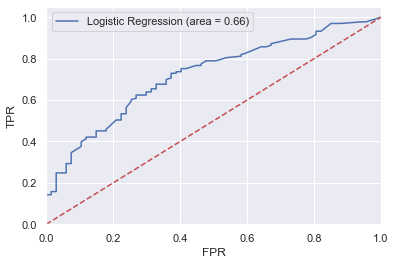

In [117]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_test2,preds1)
fpr, tpr, thresholds = roc_curve(y_test2, logreg.predict_proba(x_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="bottom right")
plt.savefig('SelectFromModel')


plt.show()

## Applying PCA to the original dummy categorical data to reduce features from 61 to a lesser number.

In [118]:
df_with_dummies.head()

,Creditability,Duration_of_Credit_month,Credit_Amount,Percentage_of_disposable_income,Duration_in_Present_Residence,Age,No_of_Credits_at_this__Bank,No_of_dependents,var_Status_of_existing_account_0 <= .. <200DM,var_Status_of_existing_account_<0DM,...,var_Housing_own,var_Housing_rent,var_Occupation_: skilled employee / official,var_Occupation_management/ self-employed/highly,var_Occupation_unemployed/ unskilled - non-resident,var_Occupation_unskilled - resident,var_Telephone_No,"var_Telephone_yes, registered under the customers name",var_Foreign_Worker_No,var_Foreign_Worker_Yes
0,1,-0.240857,-0.787657,0.918477,4,-1.281573,-0.704926,-0.428290,0,1,...,0,1,1,0,0,0,1,0,0,1
1,1,-0.987573,-0.167384,-0.870183,2,0.040363,1.027079,2.334869,0,1,...,0,1,1,0,0,0,1,0,0,1
2,1,-0.738668,-0.861381,-0.870183,4,-1.105315,-0.704926,-0.428290,1,0,...,0,1,0,0,0,1,1,0,0,1
3,1,-0.738668,-0.407341,0.024147,2,0.304750,1.027079,2.334869,0,1,...,0,1,0,0,0,1,1,0,1,0
4,1,-0.738668,-0.389974,0.918477,4,0.216621,1.027079,-0.428290,0,1,...,1,0,0,0,0,1,1,0,1,0


In [119]:
x_pca=df_with_dummies.drop('Creditability',axis=1)
y_pca=df_with_dummies['Creditability']

In [120]:
#reducing dimensions to 45 from 61

In [121]:
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
principalComponents = pca.fit_transform(x_pca)
X = pd.DataFrame(data = principalComponents)
X.shape

(1000, 40)

In [122]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_train1, x_test1, Y_train1, y_test1 = train_test_split(X,y_pca, test_size=0.2, random_state=14)
os_data_X,os_data_y = os.fit_sample(X_train1, Y_train1)
os_data_X = pd.DataFrame(data=os_data_X,columns=X_train1.columns.values.tolist())
os_data_y=pd.DataFrame(data=os_data_y,columns=['Creditability'])

In [123]:
logreg.fit(os_data_X,os_data_y)
y_pred=logreg.predict(x_test1)

In [124]:
print(metrics.classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.70      0.63        67
           1       0.83      0.73      0.78       133

    accuracy                           0.72       200
   macro avg       0.70      0.72      0.70       200
weighted avg       0.74      0.72      0.73       200



In [125]:
tn,fp,fn,tp=metrics.confusion_matrix(y_test1,y_pred).ravel()
print('True Negatives',tn)
print('False Positives',fp)
print('False Negatives',fn)
print('True Positives',tp)

True Negatives 47
False Positives 20
False Negatives 36
True Positives 97


In [126]:
#Increasing Threshold to get less false positives and more True Negatives

In [127]:
Threshold=0.60
preds1=np.where(logreg.predict_proba(x_test1)[:,1]>Threshold,1,0)
print(metrics.classification_report(y_test1,preds1))

              precision    recall  f1-score   support

           0       0.56      0.82      0.66        67
           1       0.88      0.67      0.76       133

    accuracy                           0.72       200
   macro avg       0.72      0.75      0.71       200
weighted avg       0.77      0.72      0.73       200



In [128]:
tn,fp,fn,tp=metrics.confusion_matrix(y_test1,preds1).ravel()
print('True Negatives',tn)
print('False Positives',fp)
print('False Negatives',fn)
print('True Positives',tp)

True Negatives 55
False Positives 12
False Negatives 44
True Positives 89


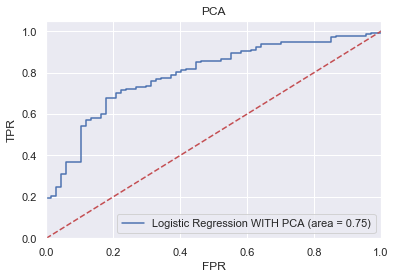

In [129]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_test1,preds1)
fpr, tpr, thresholds = roc_curve(y_test1, logreg.predict_proba(x_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression WITH PCA (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('PCA')
plt.legend(loc="bottom right")
plt.savefig('SelectFromModel_Pca')

## Applying KPrototype

In [130]:
!pip install kmodes



In [131]:
from kmodes.kprototypes import KPrototypes
clus.head()


,Creditability,Status_of_existing_account,Duration_of_Credit_month,Credit_History,Purpose,Credit_Amount,Savings_account,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,<0DM,18,critical account/ other credits existing (not ...,furniture/equipment,1049,..<100 DM,..<=1year,4,female : divorced/separated/married,...,4,if not 1 : building society savings agreement/...,21,none,rent,1,: skilled employee / official,1,No,Yes
1,1,<0DM,9,critical account/ other credits existing (not ...,car(new),2799,..<100 DM,1 <= ... < 4 years,2,male : single,...,2,real_estate,36,none,rent,2,: skilled employee / official,2,No,Yes
2,1,0 <= .. <200DM,12,all credits paid back duly til now,business,841,100 <= ..<500 DM,4 <= ... < 7 years,2,female : divorced/separated/married,...,4,real_estate,23,none,rent,1,unskilled - resident,1,No,Yes
3,1,<0DM,12,critical account/ other credits existing (not ...,car(new),2122,..<100 DM,1 <= ... < 4 years,3,male : single,...,2,real_estate,39,none,rent,2,unskilled - resident,2,No,No
4,1,<0DM,12,critical account/ other credits existing (not ...,car(new),2171,..<100 DM,1 <= ... < 4 years,4,male : single,...,4,if not 1 : building society savings agreement/...,38,bank,own,2,unskilled - resident,1,No,No


In [132]:
clus.columns

Index(['Creditability', 'Status_of_existing_account',
       'Duration_of_Credit_month', 'Credit_History', 'Purpose',
       'Credit_Amount', 'Savings_account', 'Years_of_Present_Employment',
       'Percentage_of_disposable_income', 'Sex_&_Marital_Status',
       'Guarantors/Debtors', 'Duration_in_Present_Residence', 'Property',
       'Age', 'Concurrent_Credits', 'Housing', 'No_of_Credits_at_this__Bank',
       'Occupation', 'No_of_dependents', 'Telephone', 'Foreign_Worker'],
      dtype='object')

In [133]:
df_array=clus.values

In [134]:
#Numerical Features
df_array[:, 2]=df_array[:,2].astype(float)
df_array[:,5]=df_array[:,5].astype(float)
df_array[:,8]=df_array[:,8].astype(float)
df_array[:,11]=df_array[:,11].astype(float)
df_array[:,13]=df_array[:,13].astype(float)
df_array[:,16]=df_array[:,16].astype(float)
df_array[:,18]=df_array[:,18].astype(float)

In [135]:
#Randomly assigning a K value

kproto=KPrototypes(n_clusters=4,verbose=2,max_iter=30)

In [136]:
clusters=kproto.fit_predict(df_array,categorical=[0,1,3,4,6,7,9,10,12,14,15,17,19,20])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/30, moves: 297, ncost: 1648155786.5323105
Run: 1, iteration: 2/30, moves: 194, ncost: 1378470007.5881932
Run: 1, iteration: 3/30, moves: 191, ncost: 1207094918.556433
Run: 1, iteration: 4/30, moves: 170, ncost: 1057617471.4294872
Run: 1, iteration: 5/30, moves: 118, ncost: 898846740.6936401
Run: 1, iteration: 6/30, moves: 119, ncost: 737348039.188219
Run: 1, iteration: 7/30, moves: 78, ncost: 682318749.635775
Run: 1, iteration: 8/30, moves: 43, ncost: 667036237.0545605
Run: 1, iteration: 9/30, moves: 39, ncost: 654921118.0490835
Run: 1, iteration: 10/30, moves: 9, ncost: 654296597.6066667
Run: 1, iteration: 11/30, moves: 3, ncost: 654206816.1119487
Run: 1, iteration: 12/30, moves: 2, ncost: 654183256.6353972
Run: 1, iteration: 13/30, moves: 1, ncost: 654177280.9147999
Run: 1, iteration: 14/30, moves: 0, ncost: 654177280.9147999
Init: initializing centroids
Init: initializing clusters
In

In [137]:
print(kproto.cluster_centroids_)

[array([[4.02619048e+01, 1.25117143e+04, 2.35714286e+00, 2.97619048e+00,
        3.66666667e+01, 1.40476190e+00, 1.14285714e+00],
       [3.33461538e+01, 7.12752308e+03, 2.53846154e+00, 2.85384615e+00,
        3.68000000e+01, 1.48461538e+00, 1.17692308e+00],
       [1.50607735e+01, 1.46933702e+03, 3.26151013e+00, 2.79926335e+00,
        3.56169429e+01, 1.40515654e+00, 1.13259669e+00],
       [2.35052632e+01, 3.58360702e+03, 2.71228070e+00, 2.90877193e+00,
        3.46596491e+01, 1.37543860e+00, 1.18947368e+00]]), array([['0', '0 <= .. <200DM', 'all credits paid back duly til now',
        'car(new)', '..<100 DM', '1 <= ... < 4 years', 'male : single',
        'None', 'unknown/noproperty', 'none', 'own',
        'management/ self-employed/highly',
        'yes, registered under the customers name', 'Yes'],
       ['1', 'no chking acc', 'all credits paid back duly til now',
        'car(old)', '..<100 DM', '1 <= ... < 4 years', 'male : single',
        'None', 'if not A121/A122 : car or 

In [138]:
#Choosing best value for clustering 
no_of_cluster=[]
for i in range(1,5):
    kproto=KPrototypes(n_clusters=i,verbose=1,max_iter=50)
    kproto.fit_predict(df_array,categorical=[0,1,3,4,6,7,9,10,12,14,15,17,19,20])
    no_of_cluster.append(kproto.cost_)
    


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/50, moves: 0, ncost: 7964648426.634495
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/50, moves: 0, ncost: 7964648426.634495
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/50, moves: 0, ncost: 7964648426.634495
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/50, moves: 0, ncost: 7964648426.634495
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/50, moves: 0, ncost: 7964648426.634495
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/50, moves: 0, ncost: 7964648426.634495
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/50, moves: 0, ncost: 7964648426.634495
Init: initializing c

Run: 3, iteration: 10/50, moves: 5, ncost: 1295758525.3216076
Run: 3, iteration: 11/50, moves: 5, ncost: 1295225528.9700086
Run: 3, iteration: 12/50, moves: 13, ncost: 1290313786.1448214
Run: 3, iteration: 13/50, moves: 13, ncost: 1284682385.9551241
Run: 3, iteration: 14/50, moves: 4, ncost: 1284252956.572404
Run: 3, iteration: 15/50, moves: 2, ncost: 1283714471.2024179
Run: 3, iteration: 16/50, moves: 5, ncost: 1282605005.3781497
Run: 3, iteration: 17/50, moves: 2, ncost: 1282556886.03138
Run: 3, iteration: 18/50, moves: 0, ncost: 1282556886.03138
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/50, moves: 402, ncost: 2389979845.680226
Run: 4, iteration: 2/50, moves: 310, ncost: 1642219815.035765
Run: 4, iteration: 3/50, moves: 123, ncost: 1504879490.119932
Run: 4, iteration: 4/50, moves: 88, ncost: 1419811696.661475
Run: 4, iteration: 5/50, moves: 53, ncost: 1372038968.2260287
Run: 4, iteration: 6/50, moves: 33, ncost: 1351991281.59

Run: 9, iteration: 19/50, moves: 2, ncost: 1282556886.03138
Run: 9, iteration: 20/50, moves: 0, ncost: 1282556886.03138
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/50, moves: 69, ncost: 1431656408.2943037
Run: 10, iteration: 2/50, moves: 58, ncost: 1374667843.9507766
Run: 10, iteration: 3/50, moves: 36, ncost: 1351991281.590507
Run: 10, iteration: 4/50, moves: 24, ncost: 1342634221.6274695
Run: 10, iteration: 5/50, moves: 18, ncost: 1334430528.2695034
Run: 10, iteration: 6/50, moves: 17, ncost: 1321212351.0053113
Run: 10, iteration: 7/50, moves: 13, ncost: 1314151500.799642
Run: 10, iteration: 8/50, moves: 12, ncost: 1307169599.2884698
Run: 10, iteration: 9/50, moves: 15, ncost: 1299988748.8258662
Run: 10, iteration: 10/50, moves: 15, ncost: 1296172032.6059947
Run: 10, iteration: 11/50, moves: 5, ncost: 1295758525.3216076
Run: 10, iteration: 12/50, moves: 5, ncost: 1295225528.9700086
Run: 10, iteration: 13/50, moves: 13, ncost: 

Run: 9, iteration: 7/50, moves: 9, ncost: 654296597.6066667
Run: 9, iteration: 8/50, moves: 3, ncost: 654206816.1119487
Run: 9, iteration: 9/50, moves: 2, ncost: 654183256.6353972
Run: 9, iteration: 10/50, moves: 1, ncost: 654177280.9147999
Run: 9, iteration: 11/50, moves: 0, ncost: 654177280.9147999
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/50, moves: 195, ncost: 1467952404.6222382
Run: 10, iteration: 2/50, moves: 184, ncost: 1294400486.5448215
Run: 10, iteration: 3/50, moves: 201, ncost: 1109056941.6722136
Run: 10, iteration: 4/50, moves: 124, ncost: 998715436.784755
Run: 10, iteration: 5/50, moves: 134, ncost: 801064357.1280621
Run: 10, iteration: 6/50, moves: 86, ncost: 713076909.0650576
Run: 10, iteration: 7/50, moves: 58, ncost: 675237763.6527883
Run: 10, iteration: 8/50, moves: 35, ncost: 662104488.7915406
Run: 10, iteration: 9/50, moves: 30, ncost: 654921118.0490835
Run: 10, iteration: 10/50, moves: 9, ncost: 654296597

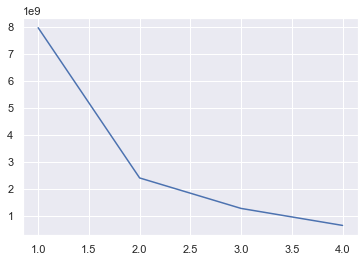

In [139]:
#Lets plot the graph for clusters
y=np.array([i for i in range(1,5)])
plt.plot(y,no_of_cluster)
plt.savefig('Elbow Graph',bbox_inches='tight')
plt.show()
#Taking 2 as the no of clusters 

In [140]:
kproto=KPrototypes(n_clusters=2,verbose=1,max_iter=50)
clust=kproto.fit_predict(df_array,categorical=[0,1,3,4,6,7,9,10,12,14,15,17,19,20])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/50, moves: 372, ncost: 3175491225.1331754
Run: 1, iteration: 2/50, moves: 149, ncost: 2503492204.9547486
Run: 1, iteration: 3/50, moves: 41, ncost: 2415612257.538436
Run: 1, iteration: 4/50, moves: 10, ncost: 2409934217.686522
Run: 1, iteration: 5/50, moves: 1, ncost: 2409867101.6321034
Run: 1, iteration: 6/50, moves: 0, ncost: 2409867101.6321034
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/50, moves: 44, ncost: 2419734468.083818
Run: 2, iteration: 2/50, moves: 14, ncost: 2409934217.686522
Run: 2, iteration: 3/50, moves: 1, ncost: 2409867101.6321034
Run: 2, iteration: 4/50, moves: 0, ncost: 2409867101.6321034
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/50, moves: 95, ncost: 2462622158.017878
Run: 3, iteration: 2/50, moves: 29, ncost: 2414774184.9043846
Run: 3, iteration: 3/50

In [141]:
#Combining Predicted Clusters into our main Dataframe
clusters_=pd.DataFrame(clust)
clusters_.head()

,0
0,1
1,1
2,1
3,1
4,1


In [142]:
clusters_

,0
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,0
998,0


In [143]:
clust=pd.concat([clus,clusters_],axis=1).reset_index()

In [144]:
clust.rename(columns={0:'Cluster'},inplace=True)

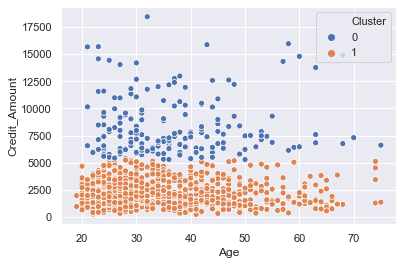

In [145]:
sns.scatterplot(x='Age',y='Credit_Amount',hue='Cluster',data=clust)

plt.savefig('Clusters',bbox_inches='tight')
plt.show()

In [155]:
cluster1=clust[clust['Cluster']==1]
cluster0=clust[clust['Cluster']==0]

In [156]:
type(cluster1)

pandas.core.frame.DataFrame

In [158]:
occ1=cluster1['Occupation'].value_counts()
occ0=cluster0['Occupation'].value_counts()

In [159]:
occ1

: skilled employee / official           535
unskilled - resident                    185
management/ self-employed/highly         86
unemployed/ unskilled - non-resident     19
Name: Occupation, dtype: int64

In [160]:
occ0

: skilled employee / official           95
management/ self-employed/highly        62
unskilled - resident                    15
unemployed/ unskilled - non-resident     3
Name: Occupation, dtype: int64